In [1]:
import os 
import shutil 

correlation_folder = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/amplitude_correlations_60k_hybrid/"
confidence_mask_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/confidence_masks"

if not os.path.exists(correlation_folder):
    os.makedirs(correlation_folder)
    
prediction_folder = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/emmernet_test_hybrid_model_map_60k_dataset"
confidence_mask_dir = "/home/abharadwaj1/papers/elife_paper/figure_information/data/confidence_masks"
atomic_mask_dir = "/home/abharadwaj1/dev/data/atomic_model_mask"
target_model_map_dir = "/home/abharadwaj1/dev/map_sharpening/emmernet/locscale_inputs/hybrid_version_C/locscale_hybrid_version_C_model_maps"


emdb_pdb_list = os.listdir(prediction_folder) 
res_dict = {"0026" : 6.3, "0038" : 3.2, "0071" : 3.9, "0093" : 3.4, "0094" : 3.4, "0132" : 3.9, "0234" : 3.3, "0408" : 3.2, "0415" : 3.1, "4288" : 4.4, "0452" : 3.7, "0490" : 7.8, "0492" : 7.7, "0567" : 3.67, "0589" : 3.9, "0592" : 3.15, "0665" : 3.9, "0776" : 2.67, "10049" : 3.3, "10069" : 3.2, "10100" : 4.15, "10105" : 4.1, "10106" : 3.5, "10273" : 4.3, "10279" : 3.33, "10324" : 3.1, "10333" : 3.2, "10418" : 2.96, "10534" : 3.4, "10585" : 3.7, "10595" : 3.25, "10617" : 3.8, "20145" : 3.3, "20146" : 4.2, "20189" : 4.3, "20234" : 3.8, "20249" : 3.2, "20254" : 3.6, "20259" : 3.57, "20270" : 4, "20271" : 4.1, "20352" : 7.8, "20521" : 2.1, "20986" : 4.1, "21012" : 3.8, "21107" : 3.07, "21144" : 3.1, "21391" : 3.5, "3661" : 5.16, "3662" : 5.16, "3802" : 4.4, "3885" : 6.1, "3908" : 3.55, "4032" : 4.35, "4073" : 3.55, "4074" : 4.3, "4079" : 4.15, "4148" : 4, "4162" : 4.1, "4192" : 3.81, "4214" : 3.4, "4241" : 4.1, "4272" : 4.3, "4401" : 3.35, "4404" : 3.93, "4429" : 4.4, "4588" : 3.6, "4589" : 3.7, "4593" : 3.7, "4728" : 4.8, "4746" : 3.47, "4759" : 3.8, "4888" : 2.8, "4889" : 2.9, "4890" : 3.1, "4907" : 3.2, "4917" : 3.9, "4918" : 4.5, "4941" : 4, "4983" : 3.5, "7009" : 3.7, "7041" : 3.7, "7065" : 6.5, "7090" : 6.5, "7334" : 3.9, "7335" : 3.5, "8911" : 3.7, "8958" : 3.7, "8960" : 3.7, "9258" : 3.6, "9259" : 3.9, "9931" : 3.3, "9934" : 3.22, "9935" : 3.08, "9939" : 2.83, "9941" : 2.95, "9695" : 3.64, "0193" : 4.3, "0257" : 3.7, "0264" : 4.6, "0499" : 2.7, "10401" : 3.77, "20449" : 2.88, "20849" : 3.77, "4611" : 3.2, "4646" : 4.34, "4733" : 3.65, "4789" : 3.2, "7133" : 3.1, "7882" : 3.32, "8069" : 4.04, "9112" : 3.1, "9298" : 4.5, "9374" : 3.5, "0282" : 3.26, "0311" : 4.2, "0560" : 3.2, "10365" : 3.1, "20220" : 3.5, "20226" : 3.2, "3545" : 5.9, "4141" : 6.7, "4531" : 2.83, "4571" : 3.3, "4997" : 3.96, "7127" : 4.1, "7573" : 3.2, "8702" : 3.55, "9610" : 3.5}

input_files = {}

for emdb_pdb in emdb_pdb_list: 
    emdb, pdb = emdb_pdb.split("_")
    correlation_folder_path = os.path.join(correlation_folder, emdb_pdb)
    if not os.path.exists(correlation_folder_path):
        os.makedirs(correlation_folder_path)
    
    prediction_path = os.path.join(prediction_folder, emdb_pdb, f"emd_{emdb}_emmernet_output.mrc")
    target_map_path = os.path.join(target_model_map_dir, f"emd_{emdb}_hybrid_model_map_refined.mrc")
    mask_path = os.path.join(confidence_mask_path, f"emd_{emdb}_FDR_confidence_final.map")
    unsharpened_map_path = os.path.join(prediction_folder, emdb_pdb, f"EMD_{int(emdb)}_unsharpened_fullmap.mrc")
    if not os.path.exists(prediction_path) or not os.path.exists(target_map_path) or not os.path.exists(mask_path) or not os.path.exists(unsharpened_map_path):
        print(f"Missing files for {emdb_pdb}")
        continue
    
    input_files[emdb_pdb] = {
        "prediction_path": prediction_path,
        "target_path": target_map_path,
        "mask_path": mask_path,
        "unsharpened_map_path": unsharpened_map_path,
    }
        
print("Done")
    
        

Missing files for 0560_6nzu
Missing files for 4141_5m1s
Missing files for 4531_6qdw
Done


In [2]:
def get_softened_mask(mask_path, threshold): 
    from locscale.include.emmer.ndimage.filter import get_cosine_mask 
    mask, apix = load_map(mask_path)
    
    mask_binarized = (mask > threshold).astype(np.int_)
    mask_smooth = get_cosine_mask(mask_binarized, 5)
    
    return mask_smooth

In [3]:
from locscale.include.emmer.ndimage.map_utils import load_map
from locscale.include.emmer.ndimage.profile_tools import frequency_array 
from locscale.include.emmer.ndimage.fsc_util import calculate_phase_correlation_maps, calculate_amplitude_correlation_maps, calculate_fsc_maps
import numpy as np 

amplitude_correlations = {}
resolutions = {}

for emdb_pdb in input_files: 
    resolutions[emdb_pdb] = res_dict[emdb_pdb.split("_")[0]]
    predicted_map_path = input_files[emdb_pdb]["prediction_path"]
    target_map_path = input_files[emdb_pdb]["target_path"]
    mask_path = input_files[emdb_pdb]["mask_path"]
    
    mask = get_softened_mask(mask_path, 0.99)
    
    predicted_map, apix = load_map(predicted_map_path)
    target_map, apix = load_map(target_map_path)
    
    predicted_map_smooth = predicted_map * mask
    target_map_smooth = target_map * mask
    
    amplitude_correlation = calculate_amplitude_correlation_maps(predicted_map_smooth, target_map_smooth)
    freq = frequency_array(amplitude_correlation, apix)
    
    amplitude_correlations[emdb_pdb] = {
        "freq": freq,
        "amplitude_correlation": amplitude_correlation,
    }
        

In [15]:
from tqdm import tqdm
phase_correlations_all = {}

for emdb_pdb in tqdm(input_files): 
    resolutions[emdb_pdb] = res_dict[emdb_pdb.split("_")[0]]
    predicted_map_path = input_files[emdb_pdb]["prediction_path"]
    target_map_path = input_files[emdb_pdb]["target_path"]
    mask_path = input_files[emdb_pdb]["mask_path"]
    unsharpened_map_path = input_files[emdb_pdb]["unsharpened_map_path"]
    
    mask = get_softened_mask(mask_path, 0.99)
    
    predicted_map, apix = load_map(predicted_map_path)
    unsharpened_map, apix = load_map(unsharpened_map_path)
    
    predicted_map_smooth = predicted_map * mask
    unsharpened_map_smooth = unsharpened_map * mask
    
    phase_correlation = calculate_phase_correlation_maps(predicted_map_smooth, unsharpened_map_smooth)
    freq = frequency_array(phase_correlation, apix)
    
    phase_correlations_all[emdb_pdb] = {
        "freq": freq,
        "phase_correlation": phase_correlation,
    }
        

100%|██████████| 11/11 [03:20<00:00, 18.22s/it]


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


def pretty_lineplot_multiple(x_axis_list, y_axis_list, xlabel, ylabel, figsize_cm=(4,4), \
                            font="Helvetica", fontsize=12, xlim=None, ylim=None, xticks=None, yticks=None,color_array=None): 
    
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import cm
    import seaborn as sns    
    import matplotlib as mpl
    ## Function not generic
    mpl.rcParams['pdf.fonttype'] = 42
    
    figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54)
    fig, ax = plt.subplots(figsize=figsize, dpi=600)
    
    sns.set_theme(context="paper", font=font)
    sns.set_style("white")
    # plot using color array 
    if color_array is not None:
        unique_color_array = np.unique(color_array)
        norm = plt.Normalize(unique_color_array.min(), unique_color_array.max())
        cmap = cm.rainbow
        
    for i in range(len(x_axis_list)): 
        x_axis = x_axis_list[i]
        y_axis = y_axis_list[i]
        color = cmap(norm(color_array[i])) if color_array is not None else "black"
        ax.plot(x_axis, y_axis, color=color)
    
    # create a color bar 
    if color_array is not None:
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax, orientation="vertical")
        cbar.ax.tick_params(labelsize=fontsize)
        cbar.set_label("Resolution (Å)", fontsize=fontsize)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    
    plt.tight_layout()
    
    if xlim is not None: 
        plt.xlim(xlim)
    if ylim is not None: 
        plt.ylim(ylim)
    if xticks is not None:    
        plt.xticks(xticks, fontsize=fontsize)
    if yticks is not None:
        plt.yticks(yticks, fontsize=fontsize)
    
    return fig



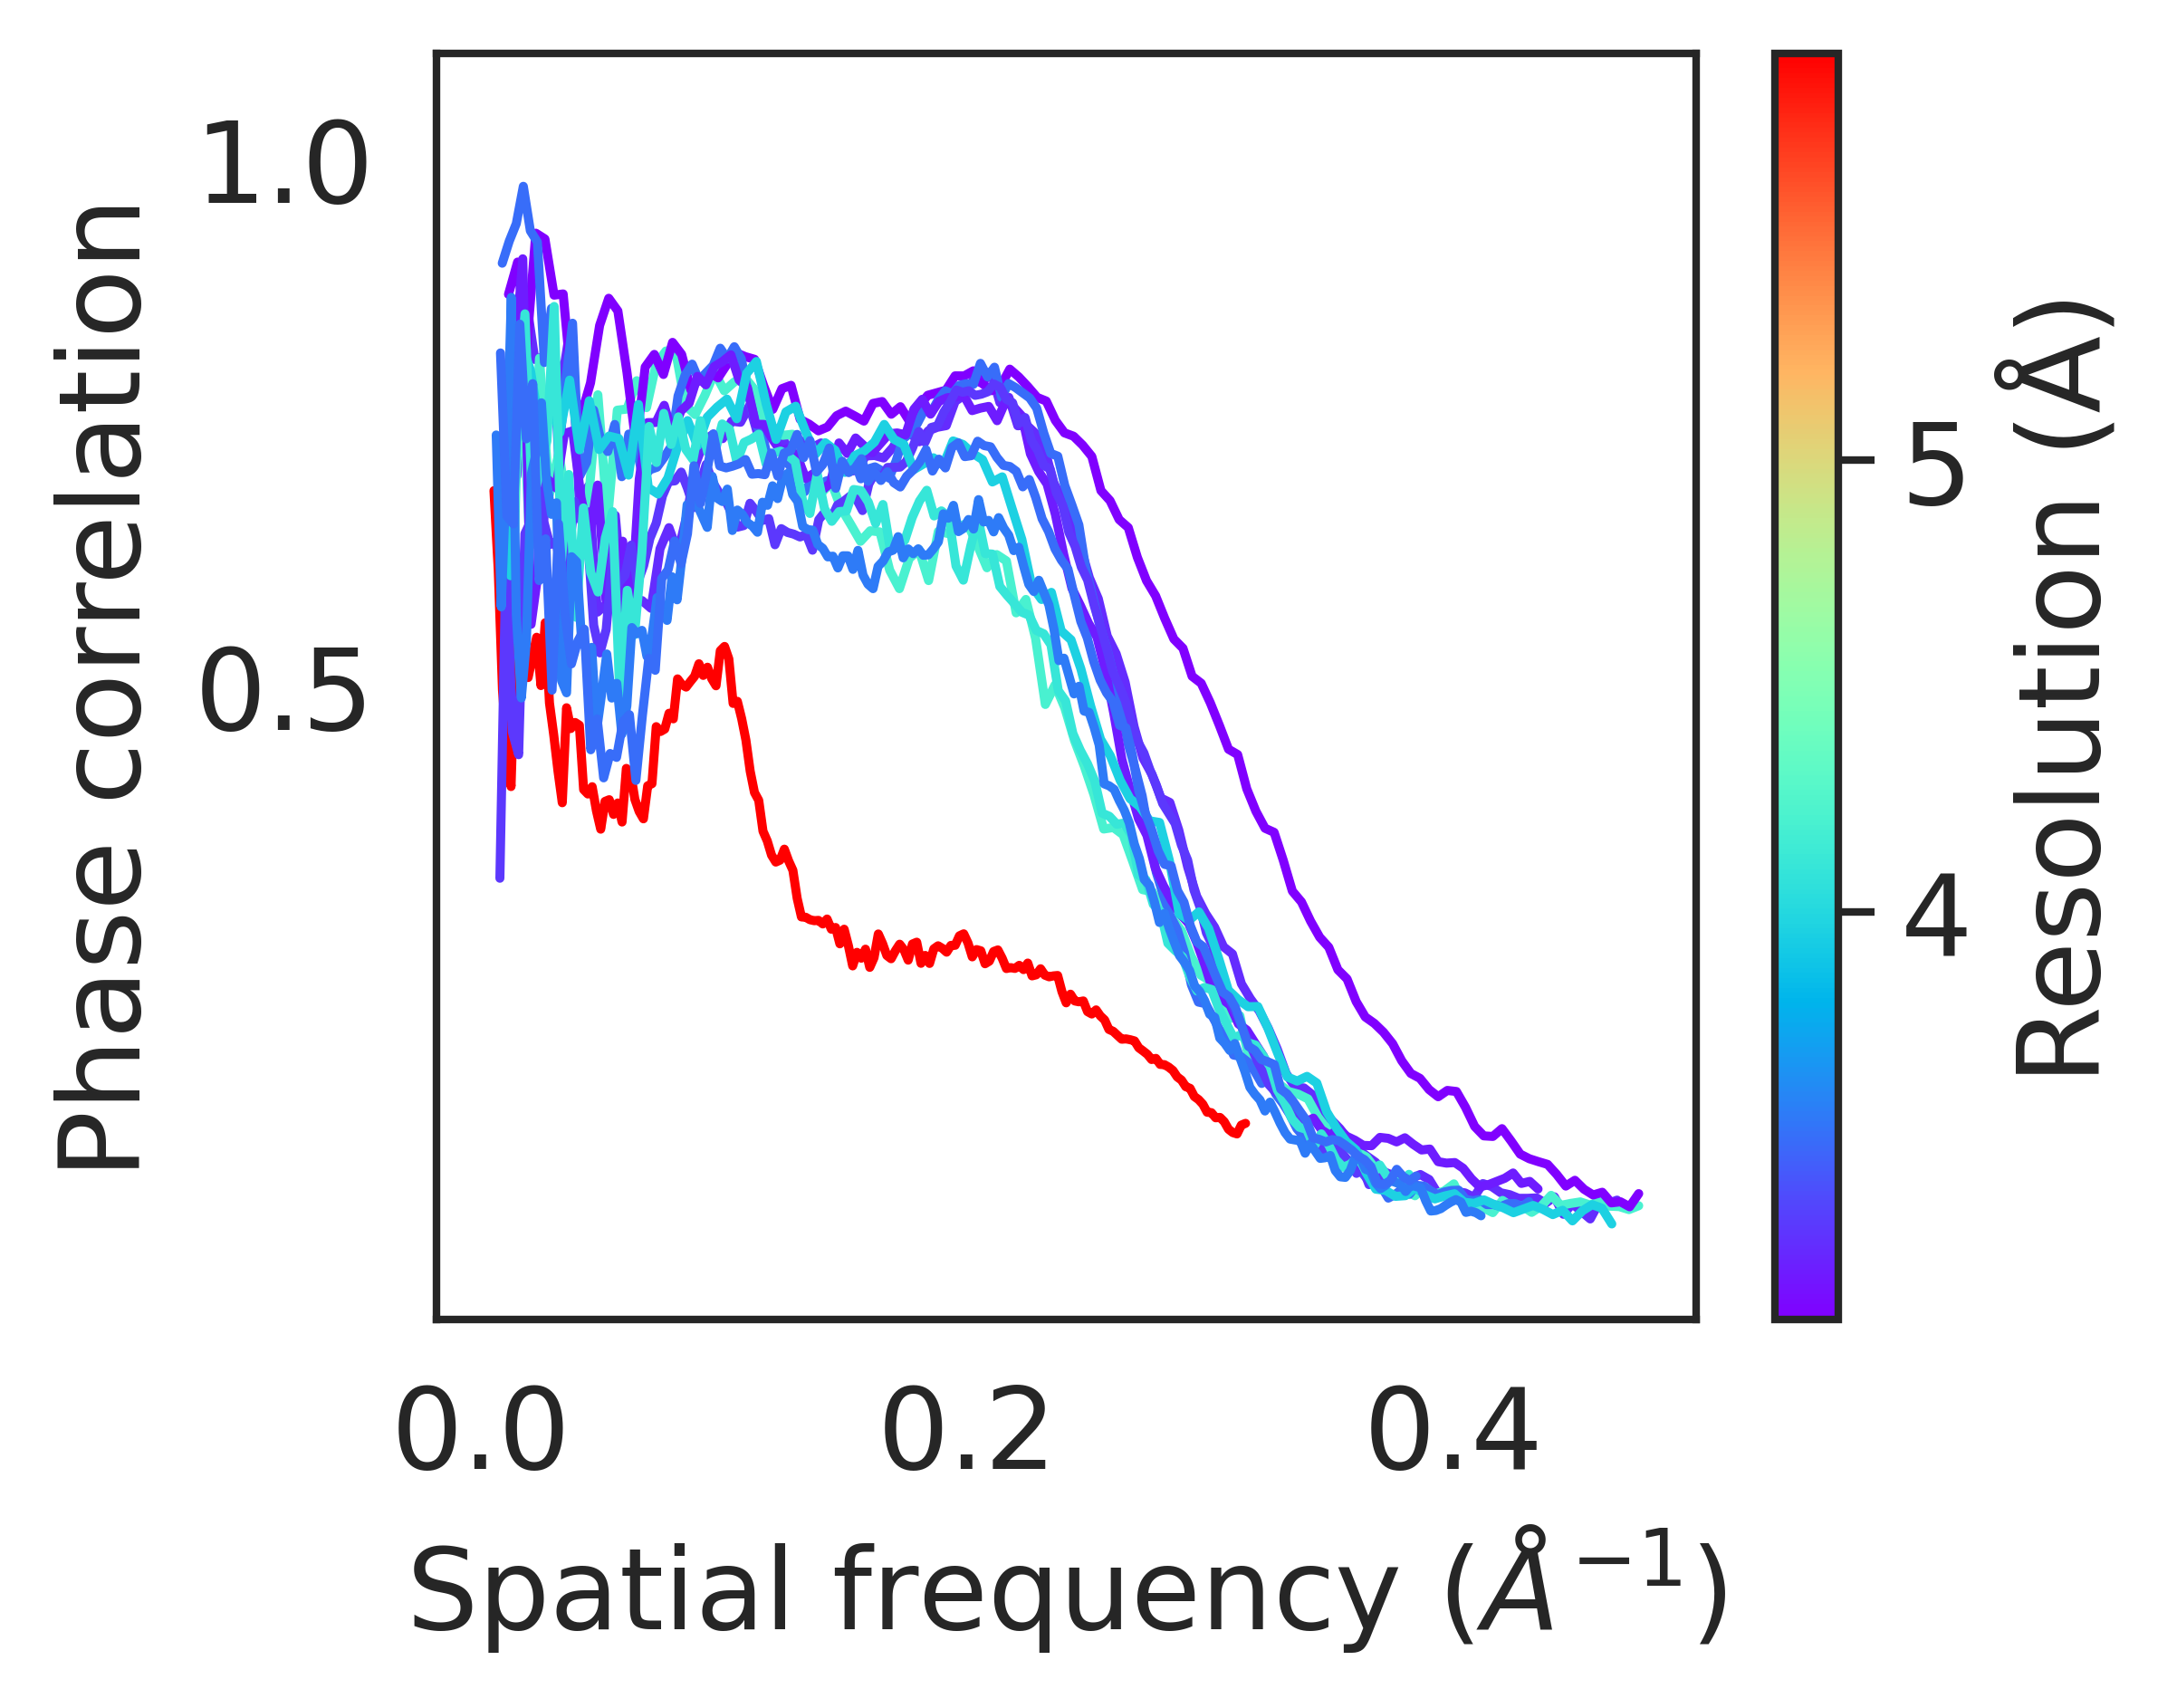

In [21]:
x_axis_list = [x["freq"][3:] for x in phase_correlations_all.values()]
y_axis_list = [x["phase_correlation"][3:] for x in phase_correlations_all.values()]

x_label = r"Spatial frequency ($\AA^{-1}$)"
y_label = "Phase correlation"

fig_phase = pretty_lineplot_multiple(x_axis_list, y_axis_list, x_label, y_label, \
        figsize_cm=(10,8), fontsize=15, ylim=[-0.1,1.1], yticks=[0.5, 1], xticks=[0, 0.2, 0.4], color_array=list(resolutions.values()))
fig_phase.savefig(os.path.join(correlation_folder, "phase_correlation.eps"), bbox_inches="tight")

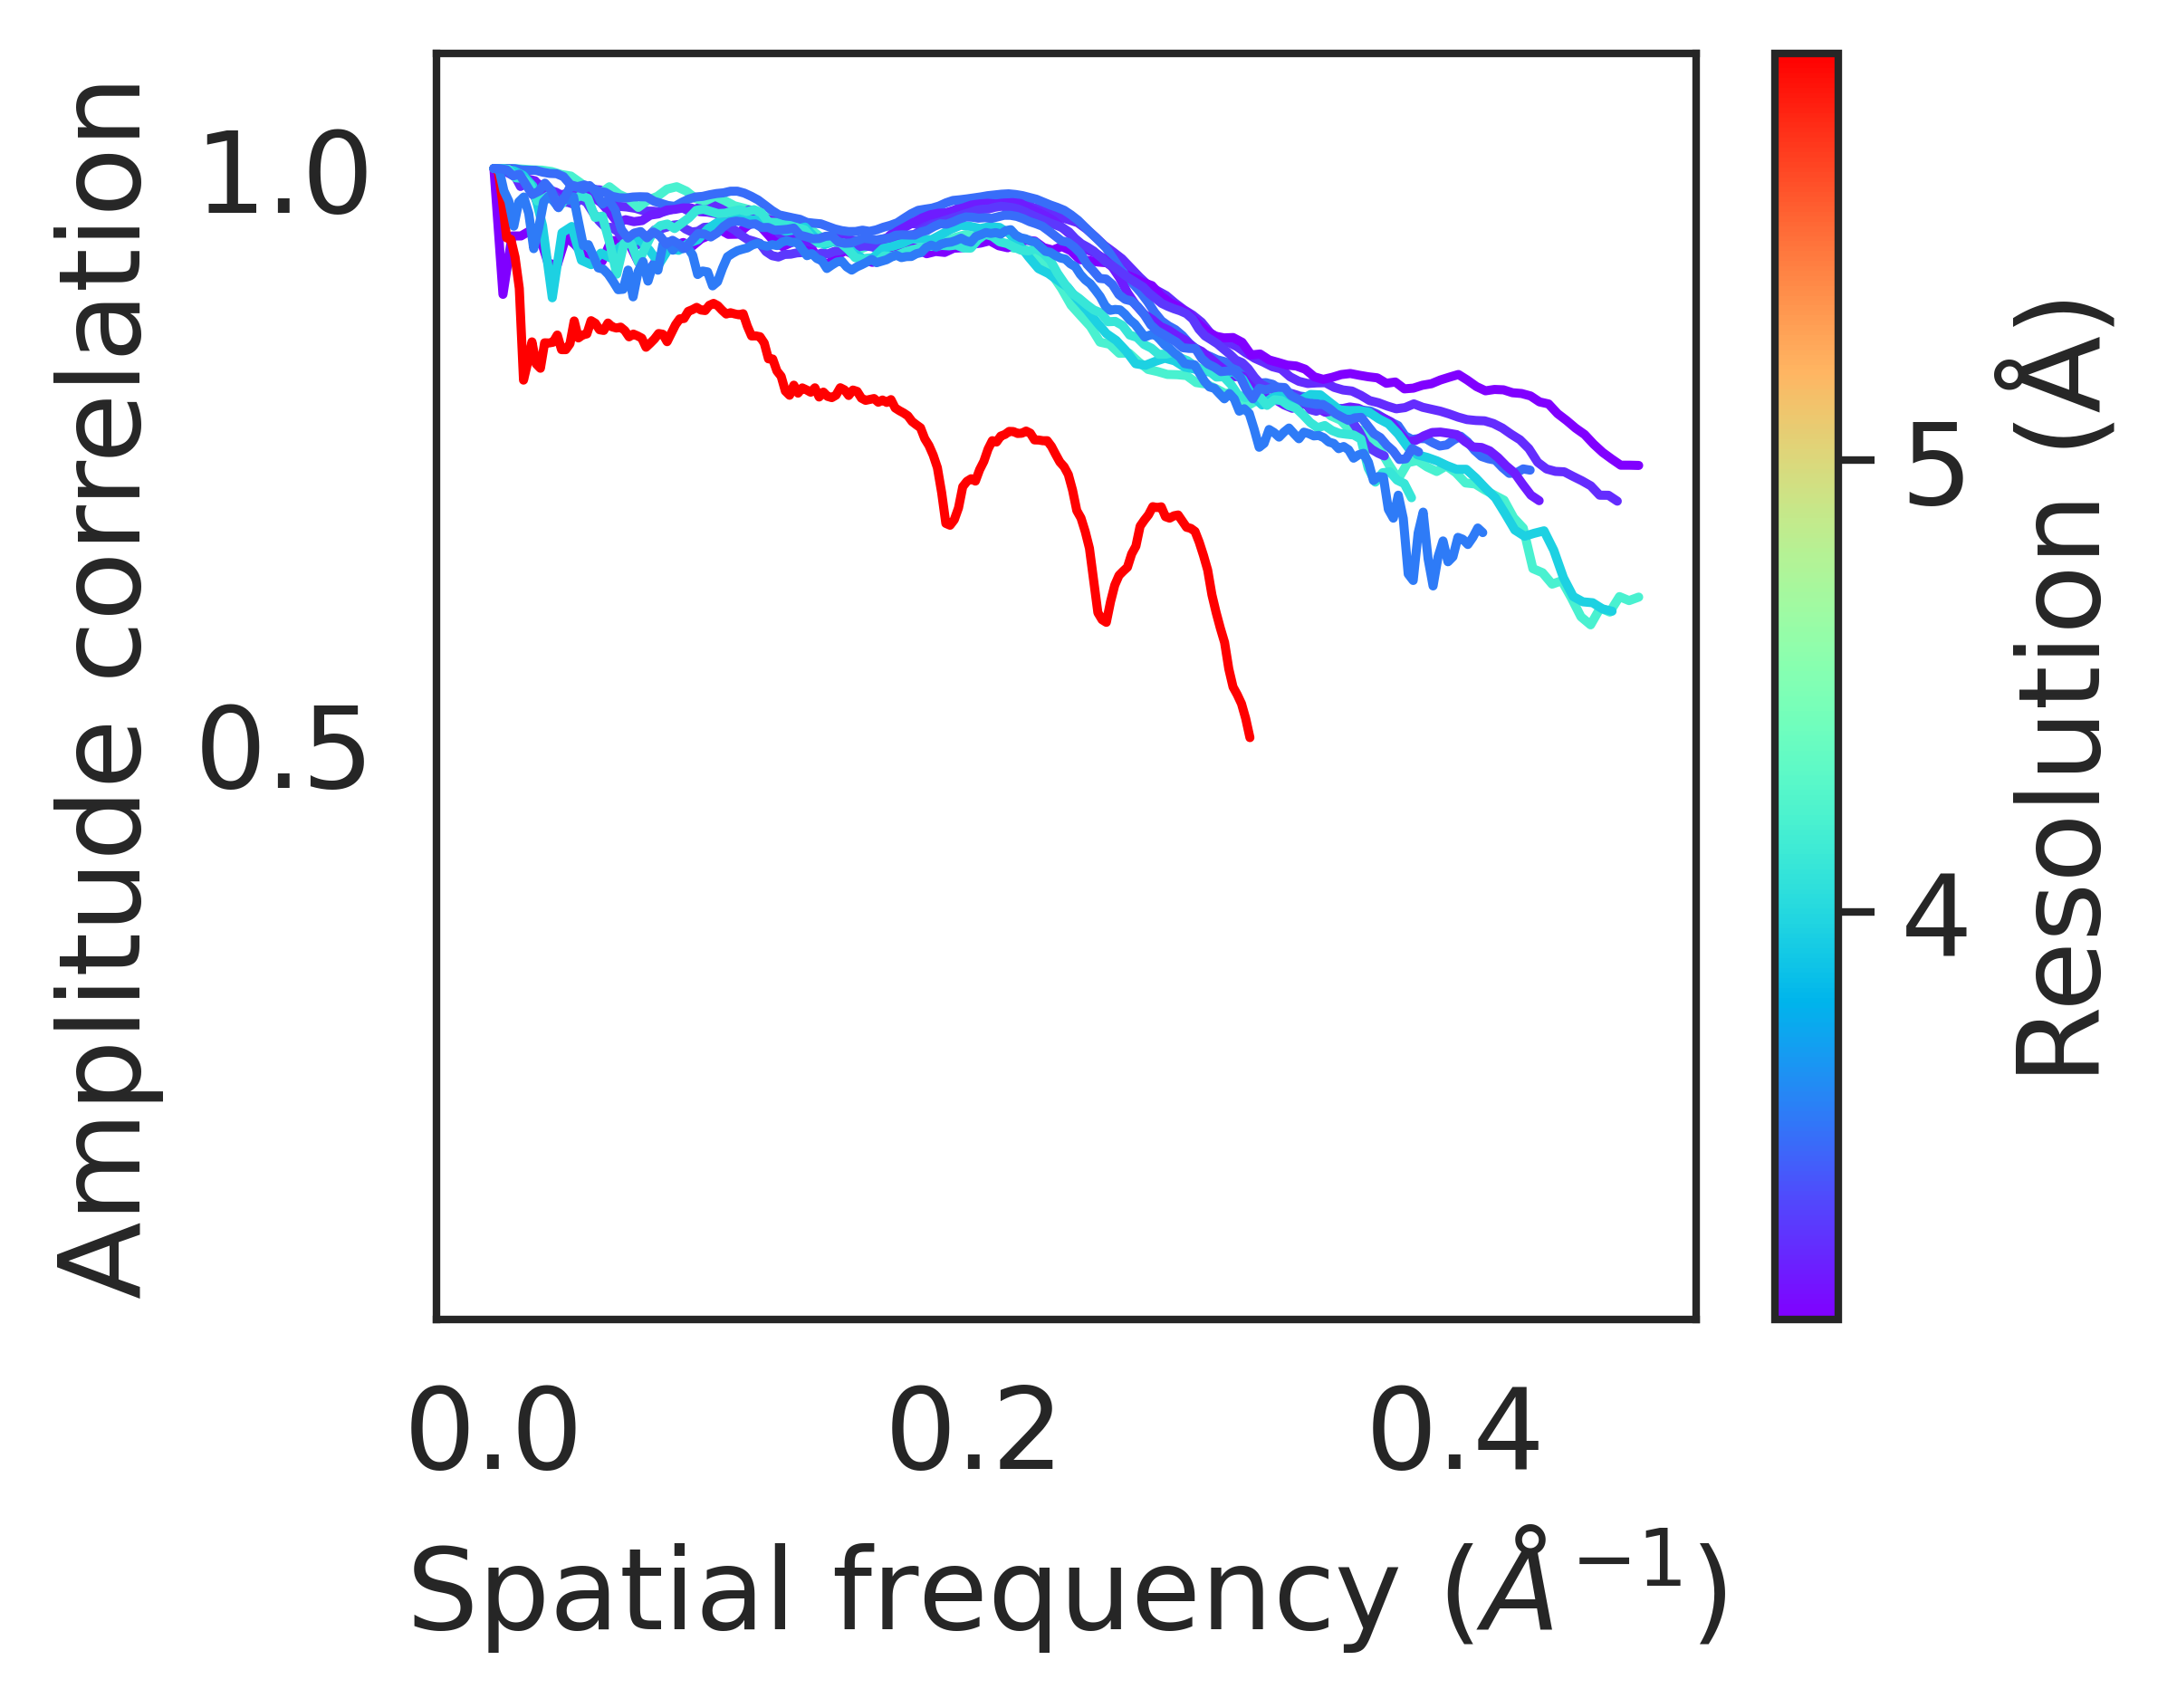

In [11]:
x_axis_list = [x["freq"] for x in amplitude_correlations.values()]
y_axis_list = [x["amplitude_correlation"] for x in amplitude_correlations.values()]

x_label = r"Spatial frequency ($\AA^{-1}$)"
y_label = "Amplitude correlation"

fig = pretty_lineplot_multiple(x_axis_list, y_axis_list, x_label, y_label, \
        figsize_cm=(10,8), fontsize=15, ylim=[0,1.1], yticks=[0.5, 1], xticks=[0, 0.2, 0.4], color_array=list(resolutions.values()))

In [12]:
fig.savefig(os.path.join(correlation_folder, "amplitude_correlation.eps"), bbox_inches="tight")


In [4]:
import subprocess 

for emdb_pdb in input_files: 
    target_map_path = input_files[emdb_pdb]["target_path"]
    prediction_map_path = input_files[emdb_pdb]["prediction_path"]
    mask_path = input_files[emdb_pdb]["mask_path"]
    
    cmd = ["python"]
    cmd.append("/home/abharadwaj1/common_scripts/plot_phase_correlation.py")
    cmd.append(prediction_map_path)
    cmd.append(target_map_path)
    cmd.append(mask_path)
    cmd.append("sdsds")
    cmd.append("amplitude")
    
    print(" ".join(cmd))
    
    subprocess.run(cmd, stderr=subprocess.PIPE, stdout=subprocess.PIPE)
    print("------------------")
    

python /home/abharadwaj1/common_scripts/plot_phase_correlation.py /home/abharadwaj1/papers/elife_paper/figure_information/outputs/emmernet_predictions_using_model_map_target/correlation_prediction_with_actual_targets/0282_6huo/emd_0282_emmernet_output.mrc /home/abharadwaj1/papers/elife_paper/figure_information/outputs/emmernet_predictions_using_model_map_target/correlation_prediction_with_actual_targets/0282_6huo/emd_0282_hybrid_model_map_target.mrc /home/abharadwaj1/papers/elife_paper/figure_information/data/confidence_masks/emd_0282_FDR_confidence_final.map sdsds amplitude
------------------
python /home/abharadwaj1/common_scripts/plot_phase_correlation.py /home/abharadwaj1/papers/elife_paper/figure_information/outputs/emmernet_predictions_using_model_map_target/correlation_prediction_with_actual_targets/0311_6hz5/emd_0311_emmernet_output.mrc /home/abharadwaj1/papers/elife_paper/figure_information/outputs/emmernet_predictions_using_model_map_target/correlation_prediction_with_actual_

In [9]:
amplitude_correlations

{'0282_6huo': {'freq': array([0.        , 0.00367945, 0.00735889, 0.01103834, 0.01471779,
         0.01839723, 0.02207668, 0.02575613, 0.02943557, 0.03311502,
         0.03679447, 0.04047391, 0.04415336, 0.04783281, 0.05151225,
         0.0551917 , 0.05887115, 0.06255059, 0.06623004, 0.06990948,
         0.07358893, 0.07726838, 0.08094782, 0.08462727, 0.08830672,
         0.09198616, 0.09566561, 0.09934506, 0.1030245 , 0.10670395,
         0.1103834 , 0.11406284, 0.11774229, 0.12142174, 0.12510118,
         0.12878063, 0.13246008, 0.13613952, 0.13981897, 0.14349842,
         0.14717786, 0.15085731, 0.15453676, 0.1582162 , 0.16189565,
         0.1655751 , 0.16925454, 0.17293399, 0.17661344, 0.18029288,
         0.18397233, 0.18765177, 0.19133122, 0.19501067, 0.19869011,
         0.20236956, 0.20604901, 0.20972845, 0.2134079 , 0.21708735,
         0.22076679, 0.22444624, 0.22812569, 0.23180513, 0.23548458,
         0.23916403, 0.24284347, 0.24652292, 0.25020237, 0.25388181,
         0.25

In [13]:

def jsonify_dictionary(input_dict):
    # convert pickle object to json object
    new_dict = {}
    for key, value in input_dict.items():
        key = str(key) 
        value_is_iterable = isinstance(value, (list, tuple, np.ndarray))
        value_is_dict = isinstance(value, dict)
        value_is_float = isinstance(value, float)
        value_is_int = isinstance(value, (np.int64, int, np.int32))
        value_is_string = isinstance(value, str)
        
        if value_is_dict:
            new_value = jsonify_dictionary(value)
        elif value_is_iterable:
            new_value = [str(x) for x in value]
        elif not value_is_string:
            new_value = str(value)
        
        new_dict[key] = new_value
        
    
    return new_dict       

In [15]:
import json 
# dump the amplitude correlations to a json file
with open("amplitude_correlations.json", "w") as f: 
    json.dump(jsonify_dictionary(amplitude_correlations), f, indent=4)